# Linescan example on the magnetization-graded waveguides

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import tetrax as tx
import numpy as np

## Sample definition as a waveguidewith graded saturation magnetization

In [2]:
sample = tx.create_sample(geometry="waveguide",name="Linescan_rect_waveguide_graded")
total_thickness = 50
res = 5
width = 200
sample.set_geom(tx.geometries.rectangle_cross_section(width,total_thickness,res,res))

Setting geometry and calculating discretized differential operators on mesh.
Done.


- This is the definition of a windowing function to set a graded magnetization

In [3]:
def R(u):
    """
    Auxiliary R function that appears in the windowing function c_inf_window.
    """
    return np.piecewise(u,[u<=0, u>0],[0,  lambda u : np.exp(-1/u)])


def S(u):
    """
    Auxiliary S function that appears in the windowing function c_inf_window.
    """
    return R(u)/(R(u)+R(1-u))


def cinf_window(t0, T, tau, A, t):
    u = (t - t0)/tau
    y = A*S(u)*S(T/tau-u)
    return y

In [4]:
sample.gamma = 185.66e9
sample.Aex = 9.9e-12

Msat_Py = 800e3
Msat_Pyirrad = 400e3

zeta = 100
rise = 25

Msat_ = Msat_Py - cinf_window(-zeta/2,zeta,rise,Msat_Pyirrad,sample.xyz.x)
sample.Msat = Msat_

print("Msat_avrg = ", sample.Msat_avrg)

Msat_avrg =  649999.9999999999


## Experiment with external field only
- we apply a field with an out-of-plane component to have a more inhomogeneous magnetization distribution along the cross section

In [5]:
sample.mag = tx.vectorfields.homogeneous(sample.xyz,70,20)
exp = tx.create_experimental_setup(sample)
exp.Bext = [300e-3,20e-3,0.0]
exp.relax(tol=1e-11)
sample.show()

Minimizing in using 'L-BFGS-B' (tolerance 1e-11) ...
Current energy length density: -3.669969646352996e-21 J/m  mx = 0.90  my = 0.03  mz = 0.326
Success!



/Users/attilak/anaconda3/lib/python3.10/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

![](rect_waveguide_linescan.png)

## Plotting values along curves
- general curves can be defined by all points of a curve or by supplying the starting and end points of a straight line with a given number of points aloing it

<IPython.core.display.Javascript object>


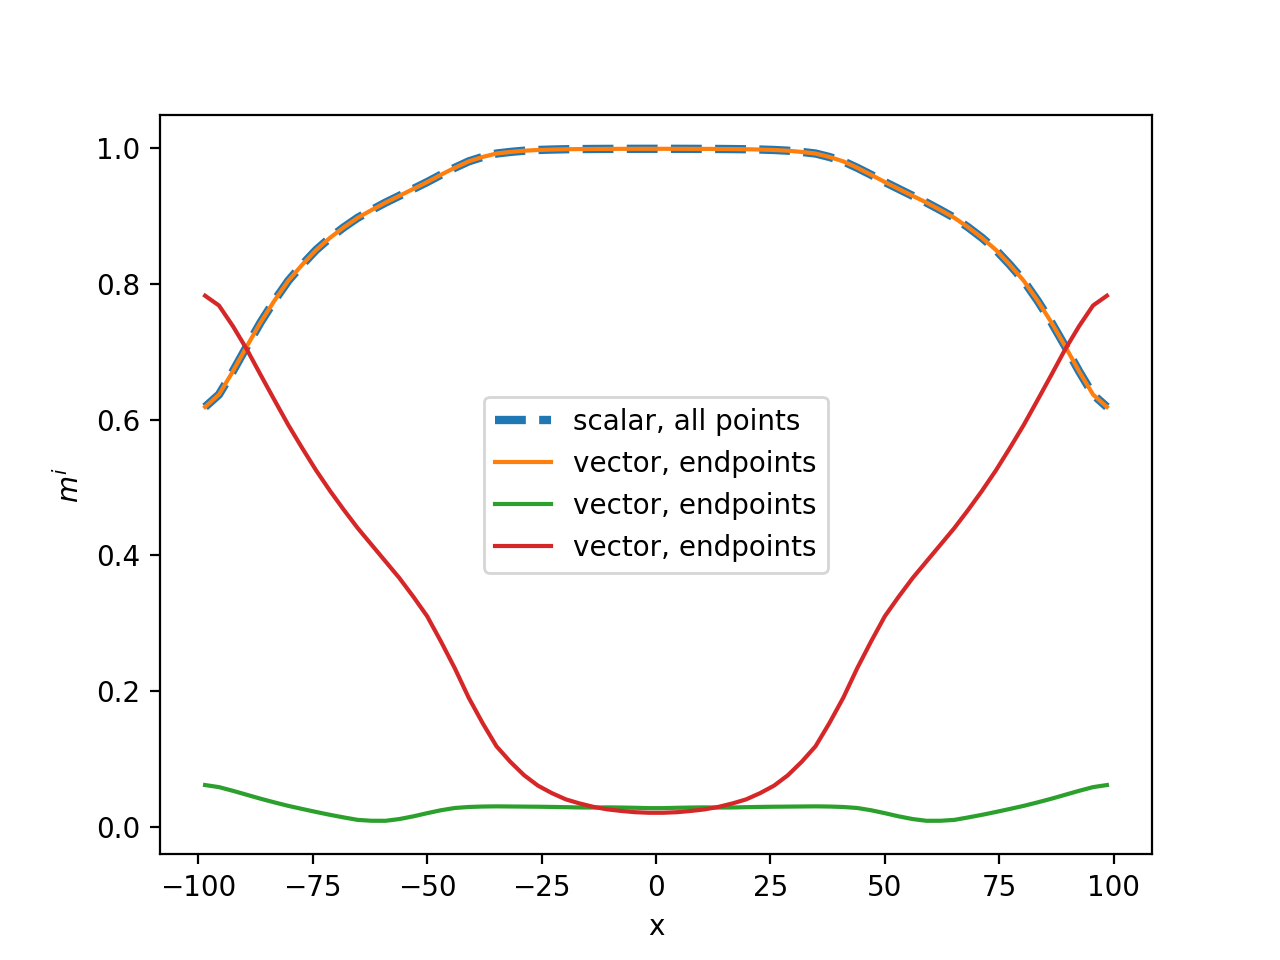

In [6]:
plt.figure()


# specifying the interpolation curve by giving all points
line_for_scan_manual = np.array([np.linspace(-150,150,100),np.zeros(100),np.zeros(100)]).T

plt.plot(line_for_scan_manual[:,0], 
         sample.scan_along_curve(sample.mag.x,line_for_scan_manual), lw=3, ls="--", label="scalar, all points")

# specifying only start and end points
scan, line_automatic = sample.scan_along_curve(sample.mag,((-150,0,0), (150,0,0)), num_points=100, return_curve=True)

plt.plot(line_automatic[:,0],scan, label="vector, endpoints")
plt.xlabel("x")
plt.ylabel(r"$m^i$")
plt.legend()
plt.show()

## Linescans for the full magnetization can also be made

<IPython.core.display.Javascript object>


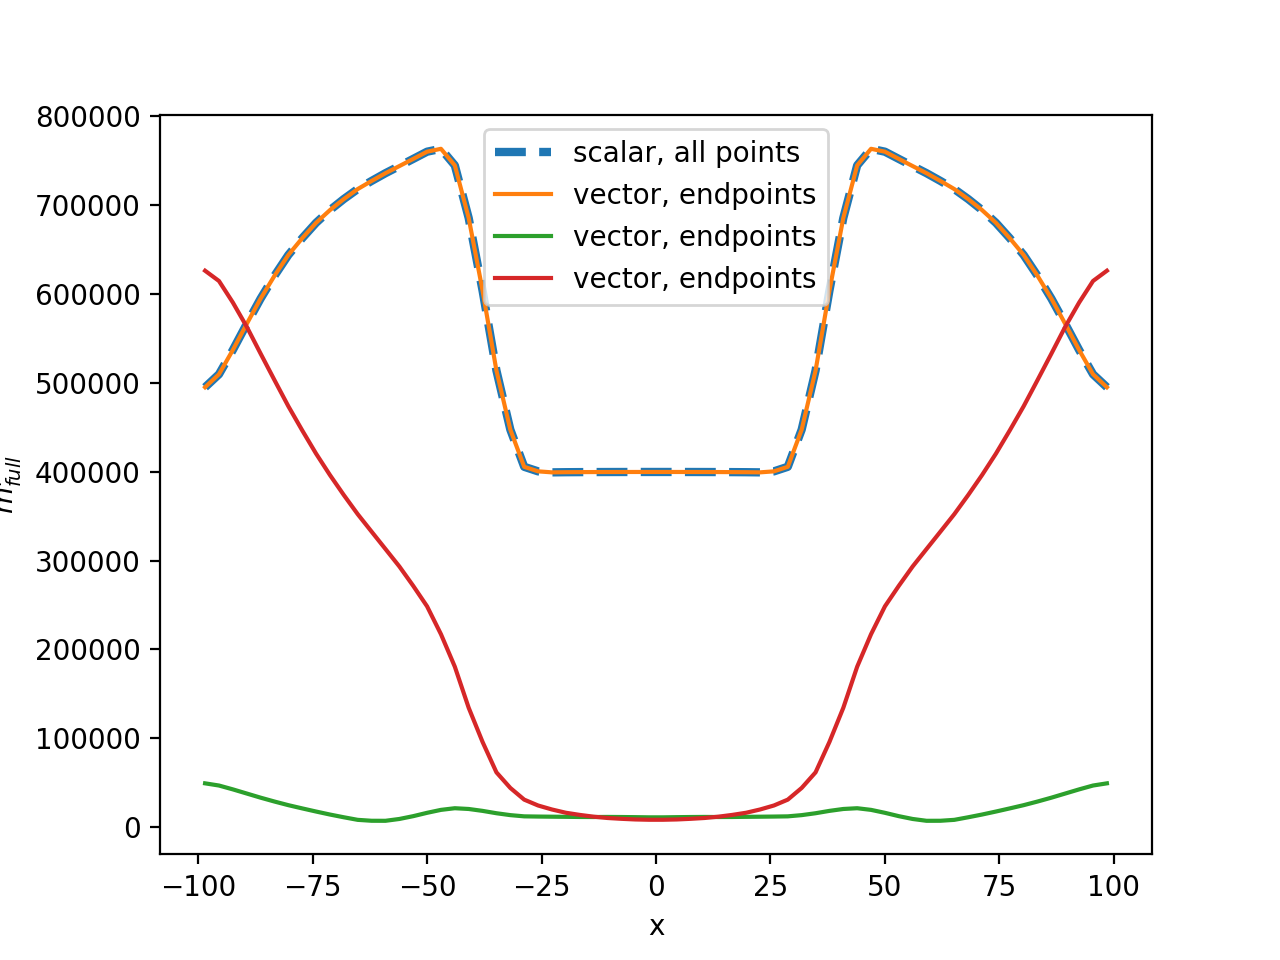

In [7]:
plt.figure()


# specifying the interpolation curve by giving all points
line_for_scan_manual = np.array([np.linspace(-150,150,100),np.zeros(100),np.zeros(100)]).T

plt.plot(line_for_scan_manual[:,0], 
         sample.scan_along_curve(sample.mag_full.x,line_for_scan_manual), lw=3, ls="--", label="scalar, all points")

# specifying only start and end points
scan, line_automatic = sample.scan_along_curve(sample.mag_full,((-150,0,0), (150,0,0)), num_points=100, return_curve=True)

plt.plot(line_automatic[:,0],scan, label="vector, endpoints")
plt.xlabel("x")
plt.ylabel(r"$m_{full}^i$")
plt.legend()
plt.show()

## For curiosity we calculate the dispersion

In [8]:
disp = exp.eigenmodes(kmin=-40e6,kmax=40e6,Nk=81, num_cpus=-1,num_modes=10,save_modes=True,no_dip=False)

100%|█████████████████████████████| 81/81 [00:56<00:00,  1.43it/s]


## Plotting the dispersion

<IPython.core.display.Javascript object>


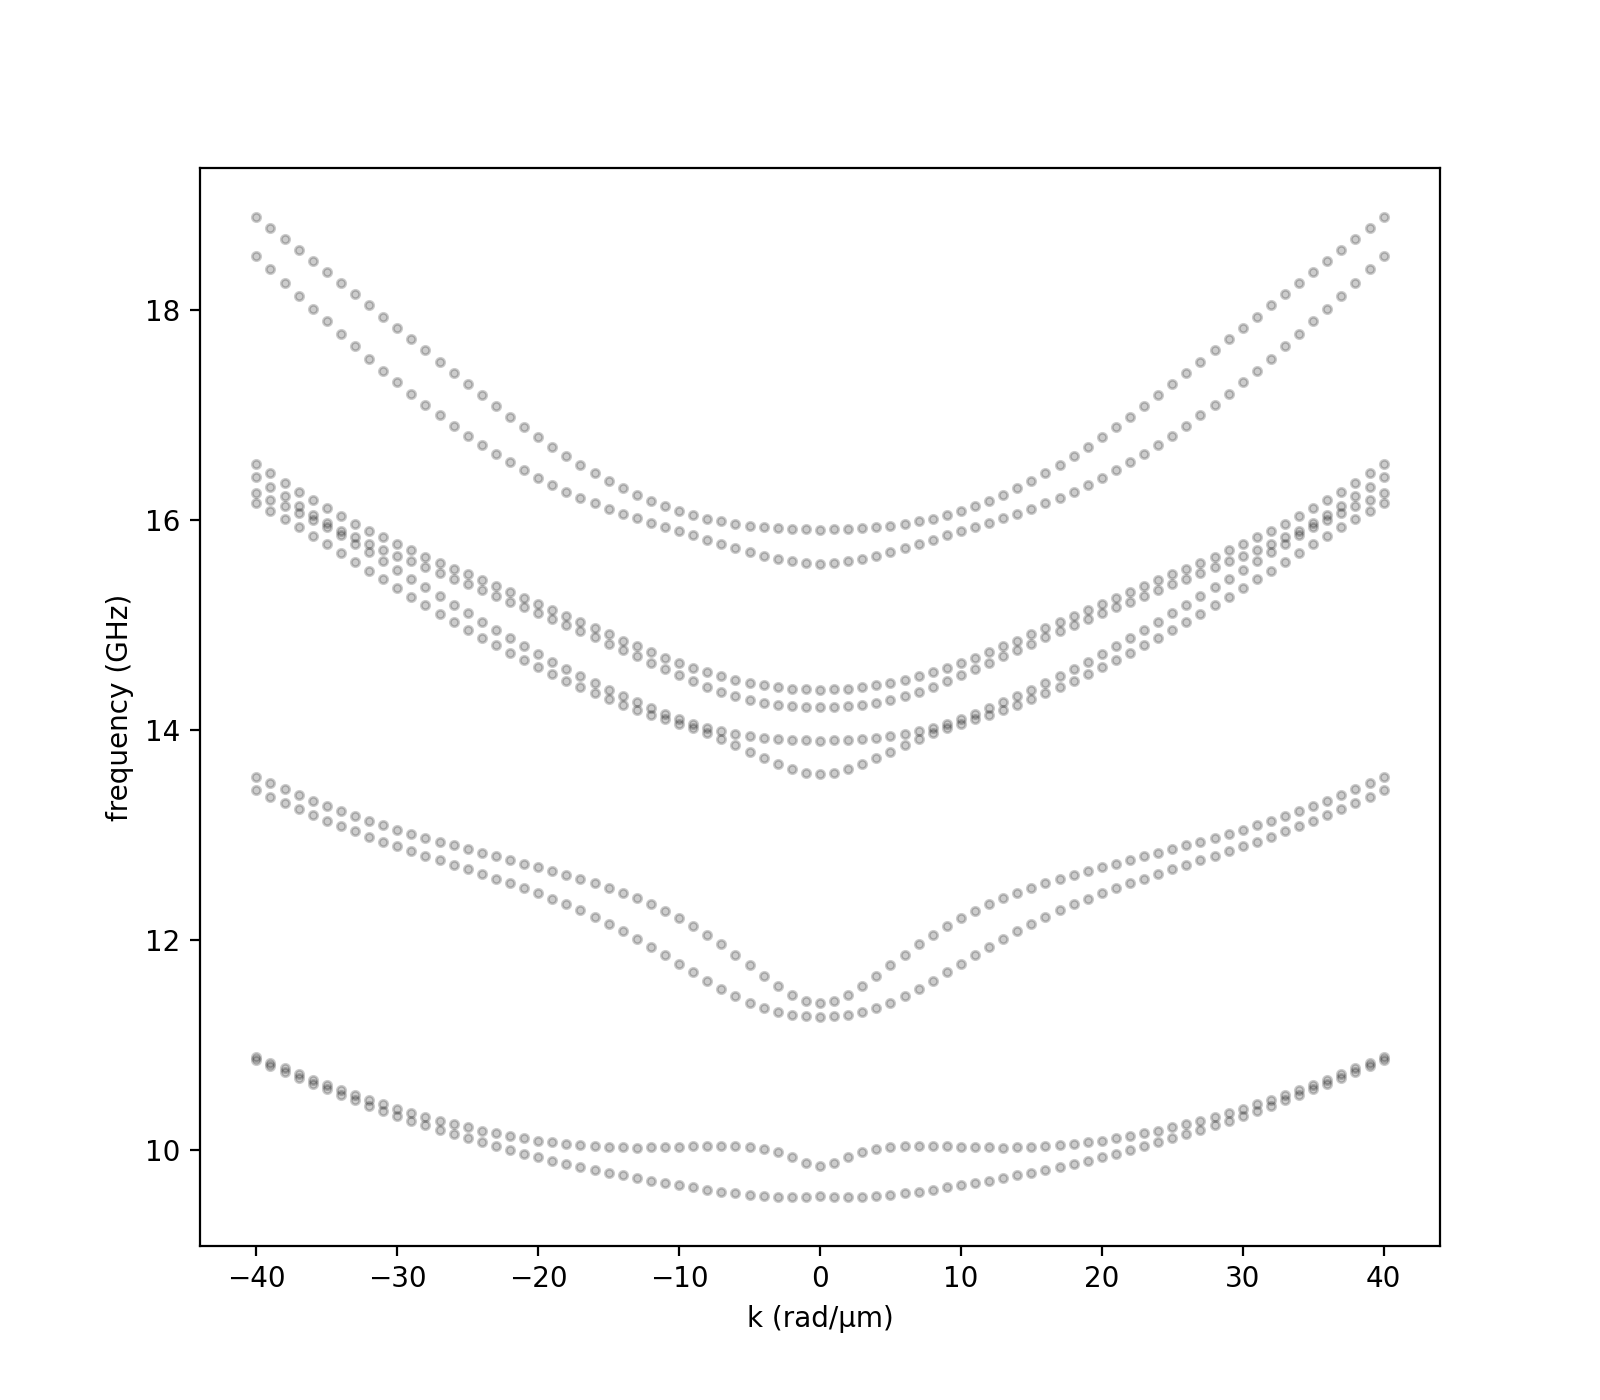

In [9]:
plt.rcParams["figure.figsize"] = (8,7)
plt.figure()

for i in range(10):
    plt.plot(disp["k (rad/m)"].values*1e-6,disp[f"f{i} (GHz)"].values,ls='',marker='.',c='black', alpha=0.2)

plt.xlabel("k (rad/µm)")    
plt.ylabel("frequency (GHz)")
plt.show()